In [1]:
# Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime as dt
#import datetime.datetime as dt

# Read Covid-19 data from https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f
#covid_df = pd.read_csv("https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv")
#covid_df.columns = [re.sub("_", " ", x) for x in covid_df.columns]


#Save Covid-19 Data to 
#covid_df.to_csv("Covid Data/covid_by_phu.csv")

# Load Covid data from last saved:
covid_df = pd.read_csv("Covid Data/covid_by_phu.csv",index_col=0)

print(covid_df.columns)
covid_df

Index(['Date', 'Algoma District', 'Brant County', 'Chatham Kent',
       'Durham Region', 'Eastern Ontario', 'Grey Bruce', 'Haldimand Norfolk',
       'Haliburton Kawartha Pine Ridge', 'Halton Region', 'City of Hamilton',
       'Hastings Prince Edward', 'Huron Perth', 'KFLA', 'Lambton County',
       'Leeds Grenville Lanark', 'Middlesex London', 'Niagara Region',
       'North Bay Parry Sound District', 'Northwestern', 'City of Ottawa',
       'Peel Region', 'Peterborough County City', 'Porcupine',
       'Waterloo Region', 'Renfrew County and District',
       'Simcoe Muskoka District', 'Southwestern', 'Sudbury and District',
       'Thunder Bay District', 'Timiskaming', 'Toronto',
       'Wellington Dufferin Guelph', 'Windsor Essex County', 'York Region',
       'Total'],
      dtype='object')


,Date,Algoma District,Brant County,Chatham Kent,Durham Region,Eastern Ontario,Grey Bruce,Haldimand Norfolk,Haliburton Kawartha Pine Ridge,Halton Region,...,Simcoe Muskoka District,Southwestern,Sudbury and District,Thunder Bay District,Timiskaming,Toronto,Wellington Dufferin Guelph,Windsor Essex County,York Region,Total
0,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
1,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2023-01-21,9,4,3,41,22,8,2,6,12,...,29,9,12,9,1,122,7,20,36,653
1095,2023-01-22,7,6,7,20,7,7,4,6,15,...,21,6,17,9,2,109,8,12,36,511
1096,2023-01-23,13,4,7,29,8,5,12,13,25,...,16,9,6,25,2,107,11,31,40,656
1097,2023-01-24,12,16,12,27,5,10,11,16,28,...,30,19,20,16,3,170,19,36,45,858


In [2]:
# Load cities of interest with corresponding census division/region
locations_df = pd.read_csv("Data/Locations of interest.csv", index_col=0)
locations_df

,News Site,City,Province,Name,Census division,Health Unit
0,BarrieToday,Barrie,Ontario,Barrie,Simcoe,NaN
1,BayToday,North Bay,Ontario,North Bay,Nipissing,NaN
2,BradfordToday,Bradford,Ontario,Bradford West Gwillimbury,Simcoe,NaN
3,BurlingtonToday,Burlington,Ontario,Burlington,Halton,NaN
4,CambridgeToday,Cambridge,Ontario,Cambridge,Waterloo,NaN
5,CollingwoodToday,Collingwood,Ontario,Collingwood,Simcoe,NaN
6,ElliotLakeToday,Elliot Lake,Ontario,Elliot Lake,Algoma,NaN
7,EloraFergusToday,Elora/Fergus,Ontario,Centre Wellington,Wellington,NaN
8,GuelphToday,Guelph,Ontario,Guelph,Wellington,NaN
9,HaltonHillsToday,Halton Hills,Ontario,Halton Hills,Halton,NaN


In [3]:
# Load cities of interest with corresponding census division/region
loc_df = pd.read_csv('Location Census data.csv', index_col=0)
loc_df

,News Site,City,Province,Name,Status,CSD type,Census division,Population(2021),Population(2016),Change,Land area(km2),Populationdensity(/km2)
0,BarrieToday,Barrie,Ontario,Barrie,Single-tier,City,Simcoe,147829.0,141434.0,4.5,99.01,1493.1
1,BayToday,North Bay,Ontario,North Bay,Single-tier,City,Nipissing,52662.0,51553.0,2.2,315.53,166.9
2,BradfordToday,Bradford,Ontario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BurlingtonToday,Burlington,Ontario,Burlington,Lower-tier,City,Halton,186948.0,183314.0,2.0,186.12,1004.4
4,CambridgeToday,Cambridge,Ontario,Cambridge,Lower-tier,City,Waterloo,138479.0,129920.0,6.6,112.99,1225.6
5,CollingwoodToday,Collingwood,Ontario,Collingwood,Lower-tier,Town,Simcoe,24811.0,21793.0,13.8,33.15,748.4
6,ElliotLakeToday,Elliot Lake,Ontario,Elliot Lake,Single-tier,City,Algoma,11372.0,10741.0,5.9,696.06,16.3
7,EloraFergusToday,Elora/Fergus,Ontario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GuelphToday,Guelph,Ontario,Guelph,Single-tier,City,Wellington,143740.0,131794.0,9.1,87.43,1644.1
9,HaltonHillsToday,Halton Hills,Ontario,Halton Hills,Lower-tier,Town,Halton,62951.0,61161.0,2.9,276.81,227.4


In [4]:
# Here we match the Covid-19 Public Health Unit with a corresponding division or region

county_covid_match = []
for subdiv, city in zip(locations_df['Census division'], loc_df['City']):
    match_list = [x for x in covid_df.columns if str(subdiv) in x]
    if len(match_list) > 0:
        county_covid_match.append(match_list[0])
    else:
        match_list = [x for x in covid_df.columns if str(city) in x]
        if len(match_list) > 0:
            county_covid_match.append(match_list[0])
        else:
            county_covid_match.append(np.nan)
        
county_covid_match
locations_df['Covid Match'] = county_covid_match

locations_df

,News Site,City,Province,Name,Census division,Health Unit,Covid Match
0,BarrieToday,Barrie,Ontario,Barrie,Simcoe,NaN,Simcoe Muskoka District
1,BayToday,North Bay,Ontario,North Bay,Nipissing,NaN,North Bay Parry Sound District
2,BradfordToday,Bradford,Ontario,Bradford West Gwillimbury,Simcoe,NaN,Simcoe Muskoka District
3,BurlingtonToday,Burlington,Ontario,Burlington,Halton,NaN,Halton Region
4,CambridgeToday,Cambridge,Ontario,Cambridge,Waterloo,NaN,Waterloo Region
5,CollingwoodToday,Collingwood,Ontario,Collingwood,Simcoe,NaN,Simcoe Muskoka District
6,ElliotLakeToday,Elliot Lake,Ontario,Elliot Lake,Algoma,NaN,Algoma District
7,EloraFergusToday,Elora/Fergus,Ontario,Centre Wellington,Wellington,NaN,Wellington Dufferin Guelph
8,GuelphToday,Guelph,Ontario,Guelph,Wellington,NaN,Wellington Dufferin Guelph
9,HaltonHillsToday,Halton Hills,Ontario,Halton Hills,Halton,NaN,Halton Region


In [6]:
phu_list = list(locations_df['Covid Match'].dropna().sort_values().drop_duplicates())
phu_list

['Algoma District',
 'Halton Region',
 'Huron Perth',
 'Niagara Region',
 'North Bay Parry Sound District',
 'Simcoe Muskoka District',
 'Sudbury and District',
 'Waterloo Region',
 'Wellington Dufferin Guelph',
 'York Region']

In [7]:
phu_all = ['Algoma District', 'Brant County', 'Chatham Kent',
       'Durham Region', 'Eastern Ontario', 'Grey Bruce', 'Haldimand Norfolk',
       'Haliburton Kawartha Pine Ridge', 'Halton Region', 'City of Hamilton',
       'Hastings Prince Edward', 'Huron Perth', 'KFLA', 'Lambton County',
       'Leeds Grenville Lanark', 'Middlesex London', 'Niagara Region',
       'North Bay Parry Sound District', 'Northwestern', 'City of Ottawa',
       'Peel Region', 'Peterborough County City', 'Porcupine',
       'Waterloo Region', 'Renfrew County and District',
       'Simcoe Muskoka District', 'Southwestern', 'Sudbury and District',
       'Thunder Bay District', 'Timiskaming', 'Toronto',
       'Wellington Dufferin Guelph', 'Windsor Essex County', 'York Region']
covid_data = covid_df.melt(phu_all).set_index('value')
covid_data = covid_data[phu_list]
covid_data
covid_data = covid_df.set_index('Date')[phu_list]
covid_data

,Algoma District,Halton Region,Huron Perth,Niagara Region,North Bay Parry Sound District,Simcoe Muskoka District,Sudbury and District,Waterloo Region,Wellington Dufferin Guelph,York Region
Date,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-01-21,9,12,4,56,6,29,12,22,7,36
2023-01-22,7,15,2,18,2,21,17,19,8,36
2023-01-23,13,25,4,42,3,16,6,21,11,40


In [8]:
#[pd.Timestamp(x) for x in covid_data.index]

In [9]:
covid_data.index >= pd.Timestamp('2022-1-1')

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

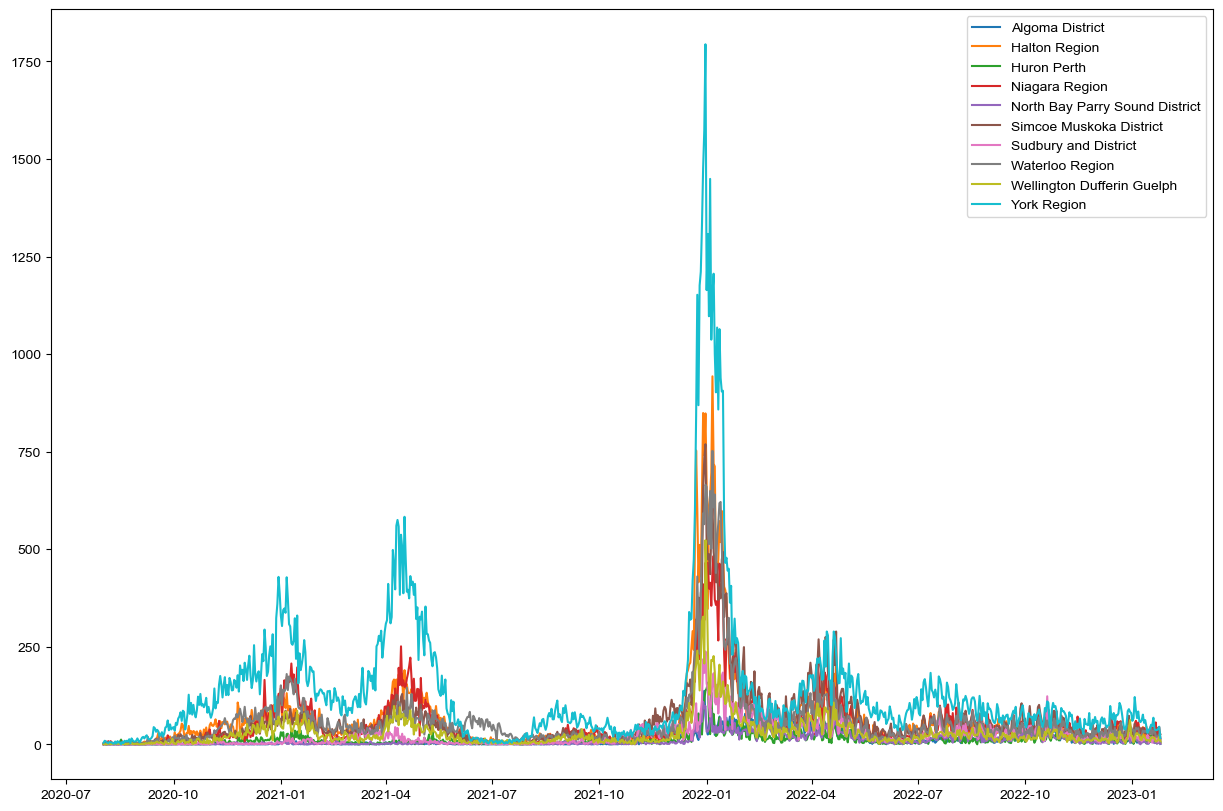

In [43]:
after_date = '2020-8-2'

covid_data = covid_df.set_index('Date')[phu_list].copy()
covid_data.index = [pd.Timestamp(x) for x in covid_data.index]
covid_data = covid_data[covid_data.index >= after_date]
x_data = covid_data.index

fig, ax = plt.subplots(figsize=(15,10))  # Create a figure containing a single axes.

for phu in covid_data.columns:
    y_data = covid_data[phu]
    ax.plot(x_data,y_data)
    
ax.legend(covid_data.columns)
fig.savefig('Covid Cases by public health unit')

In [44]:
# load packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# modify global setting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

covid_data.head(2)

,Algoma District,Halton Region,Huron Perth,Niagara Region,North Bay Parry Sound District,Simcoe Muskoka District,Sudbury and District,Waterloo Region,Wellington Dufferin Guelph,York Region
2020-08-02,0,0,1,2,0,1,0,0,1,4
2020-08-03,0,1,2,2,0,2,0,2,0,9


In [236]:
covid_data = covid_df.set_index('Date')[phu_list].copy()
covid_data.index = [pd.Timestamp(x) for x in covid_data.index]
covid_data = covid_data[covid_data.index >= after_date]

df_covid_dict = {phu:covid_data[[phu]].copy() for phu in phu_list}

data_dict = {}
for phu in phu_list:
    df = df_covid_dict[phu]

    df['year'] = [x.year for x in covid_data.index]
    df['month'] = [x.month for x in covid_data.index]

    data = df.pivot_table(index='month', columns = 'year', values = phu, aggfunc='sum')
    data.iloc[:,0:len(data.columns)-1] = data.iloc[:,0:len(data.columns)-1].fillna(0)
    data_dict[phu] = data

In [237]:
data_dict['Halton Region']

year,2020,2021,2022,2023
month,,,,
1,0.0,2314.0,12231.0,614.0
2,0.0,1059.0,1796.0,NaN
3,0.0,1479.0,2185.0,NaN
4,0.0,4031.0,3059.0,NaN
5,0.0,2280.0,1445.0,NaN
6,0.0,400.0,825.0,NaN
7,0.0,205.0,1457.0,NaN
8,65.0,525.0,1303.0,NaN
9,290.0,699.0,1034.0,NaN


Int64Index([2020, 2021, 2022, 2023], dtype='int64', name='year')


C:\Users\fsa01\AppData\Local\Temp\ipykernel_15444\3534893662.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', "Nov", "Dec"])


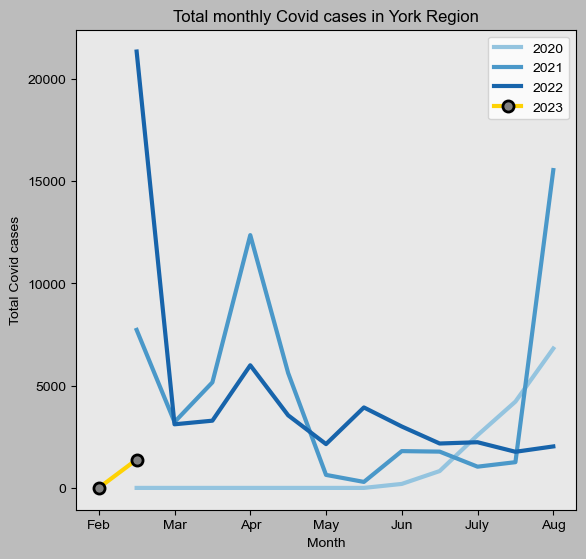

In [238]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0.1,0.1,0.5,0.8])

years = data.columns
print(years)

cmap = mpl.colormaps['Blues']

def year_to_color(x, low=0.4):
    cmap_number = cmap(1/(years.max() - years.min()) * (x - years.min()))
    return cmap((1-low)*(x-years.max())/(years.max()-years.min()) + 1)

current_year_color = mpl.colors.rgb2hex((254/255,210/255,4/255))

x = data.index
for year in years:
    if year < years.max():
        y = data[year]
        ax.plot(x,y,marker='',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
        linestyle='-',linewidth=3,zorder=2,label=year, color=year_to_color(year))
    else:
        y = data[year].dropna()
        x = list(x[0:len(y)])
        if len(y) < 12:
            x.append(0)
            y.loc[len(y)+1] = 0
        ax.plot(x,y,marker='o',markersize=8,markerfacecolor='grey',markeredgecolor='black',markeredgewidth=2,
        linestyle='-',linewidth=3,zorder=2,label=year, color=current_year_color)

ax.set_title(f'Total monthly Covid cases in {phu}')   
ax.set_ylabel("Total Covid cases")
ax.set_xlabel("Month")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', "Nov", "Dec"])
ax.set_facecolor(mpl.colors.rgb2hex((232/255,232/255,232/255)))

fig.set_facecolor((mpl.colors.rgb2hex((188/255,188/255,188/255))))
mpl.rcParams
ax.legend()

In [ ]:
data

NameError: name 'data' is not defined

Int64Index([2020, 2021, 2022, 2023], dtype='int64', name='year')


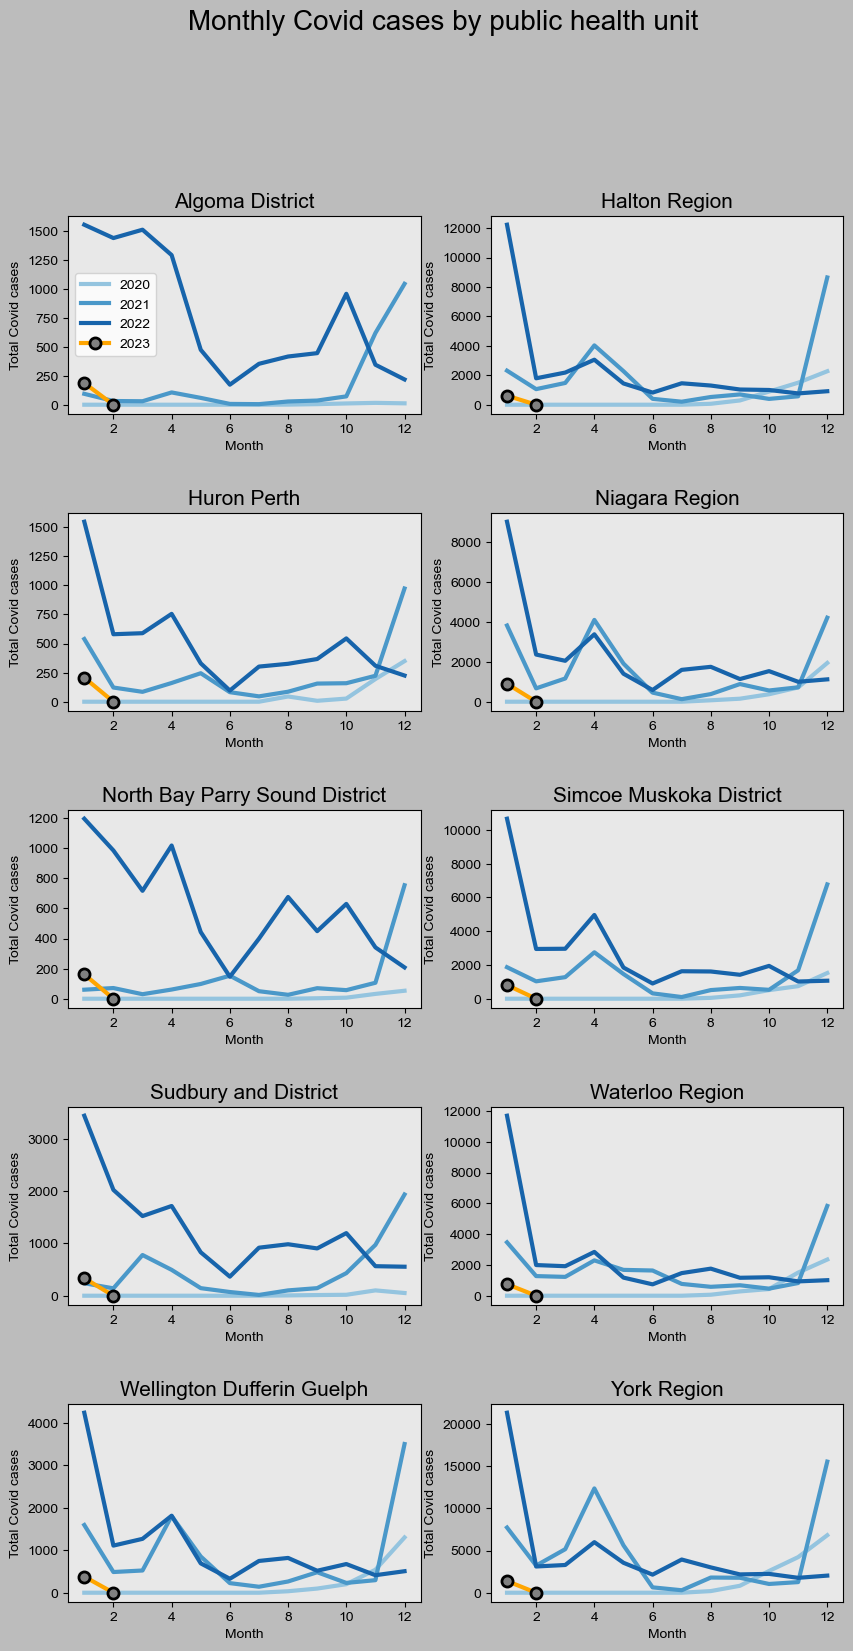

In [247]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18), gridspec_kw={'wspace':0.2,'hspace':0.5})

years = data.columns
print(years)

cmap = mpl.colormaps['Blues']

def year_to_color(x, low=0.4):
    cmap_number = cmap(1/(years.max() - years.min()) * (x - years.min()))
    return cmap((1-low)*(x-years.max())/(years.max()-years.min()) + 1)

current_year_color = mpl.colors.rgb2hex((254/255,210/255,4/255))

phu_select = list(data_dict.keys())
for i in range(0,5):
    for j in range (0,2):
        ax = axes[i,j]
        #print(phu)
        phu = phu_select[j+2*i]
        #print(phu)
        data = data_dict[phu]
        #print(data.iloc[0])

        x = data.index
        for year in years:
            if year < years.max():
                y = data[year]
                ax.plot(x,y,marker='',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color=year_to_color(year))
            else:
                y = data[year].dropna()
                x = list(x[0:len(y)])
                if len(y) < 12:
                    x.append(len(y)+1)
                    y.loc[len(y)+1] = 0
                ax.plot(x,y,marker='o',markersize=8,markerfacecolor='grey',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color= 'orange') #current_year_color)
        
        if i == 0 and j == 0:
            ax.legend()
        ax.set_title(f'{phu}', fontsize=15)   
        ax.set_ylabel("Total Covid cases")
        ax.set_xlabel("Month")
        #ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', "Dec"])
        ax.set_facecolor(mpl.colors.rgb2hex((232/255,232/255,232/255)))

fig.set_facecolor((mpl.colors.rgb2hex((188/255,188/255,188/255))))
fig.suptitle("Monthly Covid cases by public health unit", verticalalignment='bottom', fontsize=20)
fig.savefig("Monthly Covid cases by public health unit.png")

Int64Index([2020, 2021, 2022, 2023], dtype='int64', name='year')


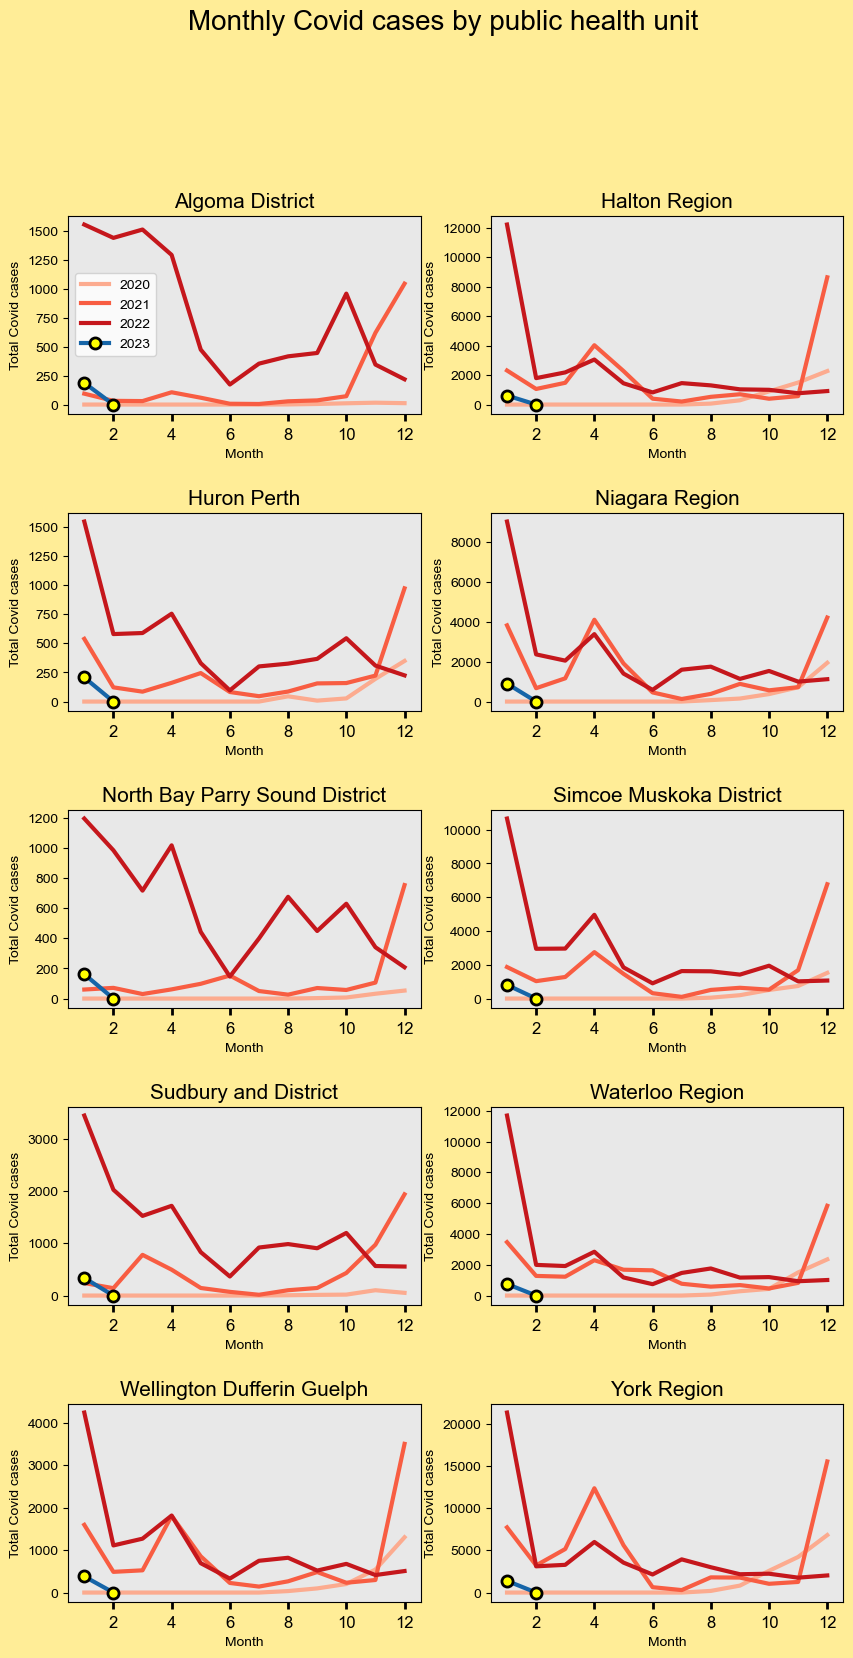

In [267]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18), gridspec_kw={'wspace':0.2,'hspace':0.5})

years = data.columns
print(years)

cmap = mpl.colormaps['Reds']

def year_to_color(x, low=0.3):
    cmap_number = cmap(1/(years.max() - years.min()) * (x - years.min()))
    return cmap((1-low)*(x-years.max())/(years.max()-years.min()) + 1)

current_year_color = mpl.colors.rgb2hex((22/255,101/255,168/255))

phu_select = list(data_dict.keys())
for i in range(0,5):
    for j in range (0,2):
        ax = axes[i,j]
        #print(phu)
        phu = phu_select[j+2*i]
        #print(phu)
        data = data_dict[phu]
        #print(data.iloc[0])

        x = data.index
        for year in years:
            if year < years.max():
                y = data[year]
                ax.plot(x,y,marker='',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color=year_to_color(year))
            else:
                y = data[year].dropna()
                x = list(x[0:len(y)])
                if len(y) < 12:
                    x.append(len(y)+1)
                    y.loc[len(y)+1] = 0
                ax.plot(x,y,marker='o',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color= current_year_color)
        
        if i == 0 and j == 0:
            ax.legend()
        ax.set_title(f'{phu}', fontsize=15,)   
        ax.set_ylabel("Total Covid cases")
        ax.set_xlabel("Month")
        ax.tick_params(axis='x',which='major',direction='out',length=5,width=2,color='black',pad=5,labelsize=12,labelcolor='black',
               labelrotation=0)
        #ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', "Dec"])
        ax.set_facecolor(mpl.colors.rgb2hex((232/255,232/255,232/255)))

fig.set_facecolor((mpl.colors.rgb2hex((255/255,237/255,151/255))))
fig.suptitle("Monthly Covid cases by public health unit", verticalalignment='bottom', fontsize=20)
fig.savefig("Monthly Covid cases by public health unit (alt color).png")

Int64Index([2020, 2021, 2022, 2023], dtype='int64', name='year')


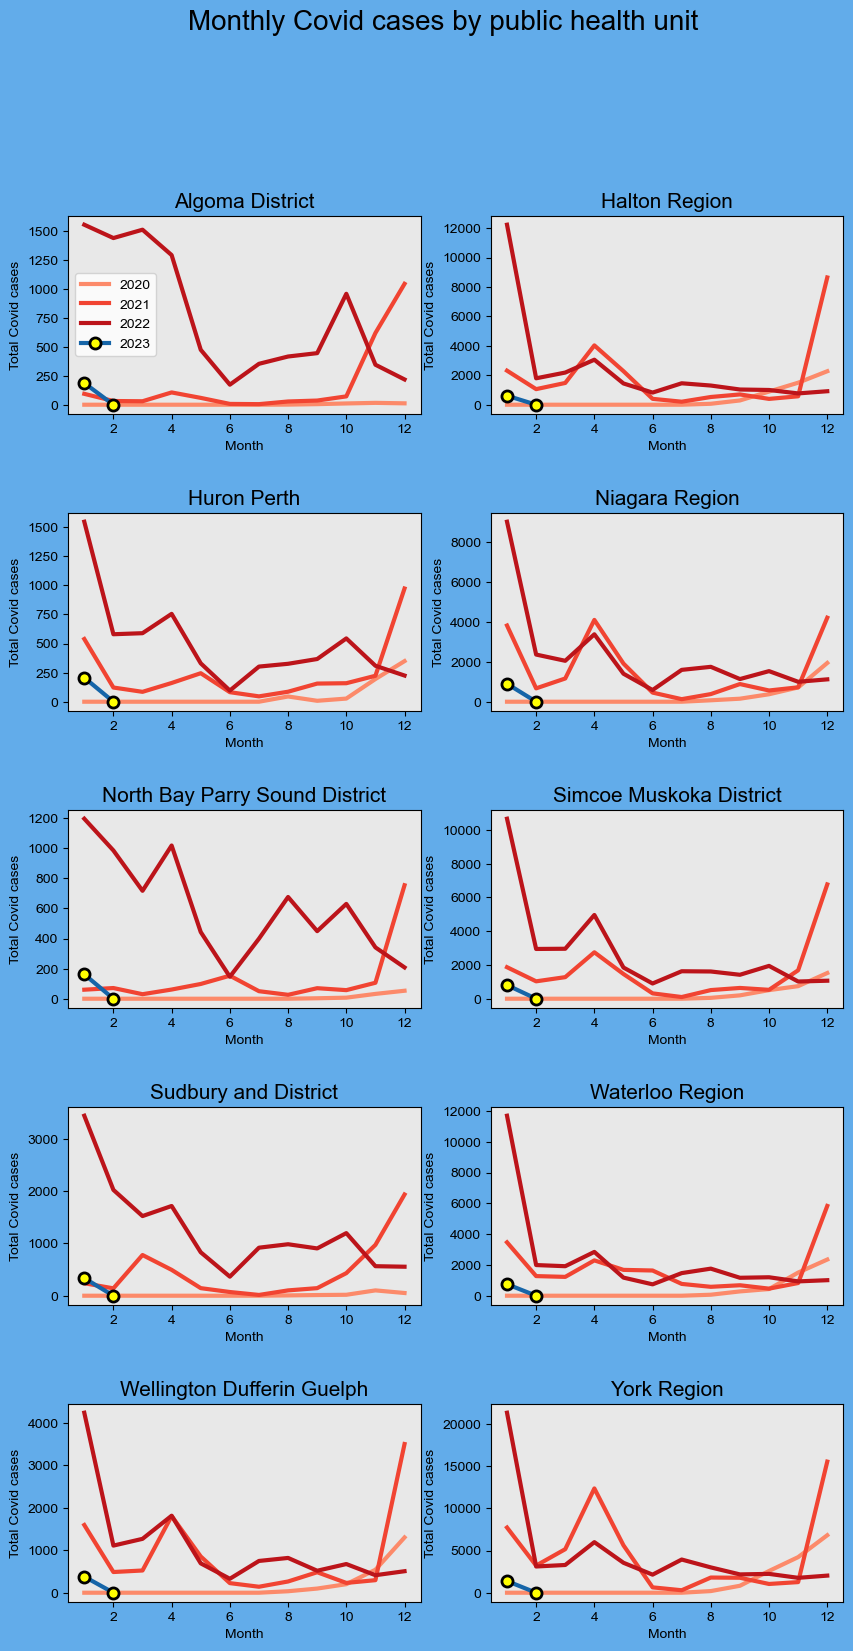

In [261]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18), gridspec_kw={'wspace':0.2,'hspace':0.5})

years = data.columns
print(years)

cmap = mpl.colormaps['Reds']

def year_to_color(x, low=0.4):
    cmap_number = cmap(1/(years.max() - years.min()) * (x - years.min()))
    return cmap((1-low)*(x-years.max())/(years.max()-years.min()) + 1)

current_year_color = mpl.colors.rgb2hex((22/255,101/255,168/255))

phu_select = list(data_dict.keys())
for i in range(0,5):
    for j in range (0,2):
        ax = axes[i,j]
        #print(phu)
        phu = phu_select[j+2*i]
        #print(phu)
        data = data_dict[phu]
        #print(data.iloc[0])

        x = data.index
        for year in years:
            if year < years.max():
                y = data[year]
                ax.plot(x,y,marker='',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color=year_to_color(year))
            else:
                y = data[year].dropna()
                x = list(x[0:len(y)])
                if len(y) < 12:
                    x.append(len(y)+1)
                    y.loc[len(y)+1] = 0
                ax.plot(x,y,marker='o',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color= current_year_color)
        
        if i == 0 and j == 0:
            ax.legend()
        ax.set_title(f'{phu}', fontsize=15,)   
        ax.set_ylabel("Total Covid cases")
        ax.set_xlabel("Month")
        #ax.set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', "Dec"])
        ax.set_facecolor(mpl.colors.rgb2hex((232/255,232/255,232/255)))

fig.set_facecolor((mpl.colors.rgb2hex((98/255,172/255,234/255))))
fig.suptitle("Monthly Covid cases by public health unit", verticalalignment='bottom', fontsize=20)
fig.savefig("Monthly Covid cases by public health unit (alt color).png")

In [182]:
axes[0][0]

for i in range(0,5):
    for j in range (0,2):
        print((i,j))

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(3, 0)
(3, 1)
(4, 0)
(4, 1)


In [163]:
{k:v for k, v in mpl.rcParams.items() if 'color' in k}

{'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.labelcolor': 'black',
 'axes.titlecolor': 'auto',
 'boxplot.boxprops.color': 'black',
 'boxplot.capprops.color': 'black',
 'boxplot.flierprops.color': 'black',
 'boxplot.flierprops.markeredgecolor': 'black',
 'boxplot.flierprops.markerfacecolor': 'none',
 'boxplot.meanprops.color': 'C2',
 'boxplot.meanprops.markeredgecolor': 'C2',
 'boxplot.meanprops.markerfacecolor': 'C2',
 'boxplot.medianprops.color': 'C1',
 'boxplot.whiskerprops.color': 'black',
 'figure.edgecolor': 'white',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'hatch.color': 'black',
 'legend.edgecolor': '0.8',
 'legend.facecolor': 'inherit',
 'legend.labelcolor': 'None',
 'lines.color': 'C0',
 'lines.markeredgecolor': 'auto',
 'lines.markerfacecolor': 'auto',
 'patch.edgecolor': 'black',
 'patch.facecolor': 'C0',
 'patch.force_edgecolor': False,
 'pcolor.shading': 'auto',
 'pcolormesh.snap': True,
 'pdf.inheritcolor': False,
 'savefig.edgecolor': 'a

In [146]:
year_to_color(2023)

(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)

In [159]:
mpl.colors.rgb2hex((232/255,232/255,232/255))

'#e8e8e8'

In [106]:
def f(x):
    return (1/(years.max() - years.min()) * (x - years.min()))
f(years.max())

1.0

In [84]:
cmap = mpl.colormaps['Blues']
cmap(0)

(0.9686274509803922, 0.984313725490196, 1.0, 1.0)

In [30]:
phu_covidcase_dict = {} # {phu : [covid_case 2020_list, covid_case 2021_list,...]}
for phu in covid_data.columns:
    y_list = []
    for year in range(covid_data.index.min().year, covid_data.index.max().year + 1): # Cycle through years avaiable
        y = [covid_data[covid_data.index.year == year]]
        y_list.append(y)
    phu_covidcase_dict[phu] = y_list

In [42]:
covid_data['year'] = [x.year for x in covid_data.index]
covid_data['month'] = [x.month for x in covid_data.index]
covid_data['day'] = [x.day for x in covid_data.index]
covid_data

,Algoma District,Halton Region,Huron Perth,Niagara Region,North Bay Parry Sound District,Simcoe Muskoka District,Sudbury and District,Waterloo Region,Wellington Dufferin Guelph,York Region,year,month,day
2020-08-02,0,0,1,2,0,1,0,0,1,4,2020,8,2
2020-08-03,0,1,2,2,0,2,0,2,0,9,2020,8,3
2020-08-04,0,1,0,7,0,1,1,0,0,7,2020,8,4
2020-08-05,0,1,0,1,0,1,0,0,0,5,2020,8,5
2020-08-06,0,5,0,8,0,1,0,4,2,3,2020,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-21,9,12,4,56,6,29,12,22,7,36,2023,1,21
2023-01-22,7,15,2,18,2,21,17,19,8,36,2023,1,22
2023-01-23,13,25,4,42,3,16,6,21,11,40,2023,1,23
2023-01-24,12,28,6,44,11,30,20,26,19,45,2023,1,24


In [ ]:
covid_data[[x]]

In [11]:
phu_case_list = [covid_data[y] for y in covid_data]
y2 = np.random.randint(low=300,high=400,size=10)

In [16]:
phu_case_list = [covid_data[y] for y in covid_data]
[y for y in phu_case_list]

[2020-08-02     0
 2020-08-03     0
 2020-08-04     0
 2020-08-05     0
 2020-08-06     0
               ..
 2023-01-21     9
 2023-01-22     7
 2023-01-23    13
 2023-01-24    12
 2023-01-25     1
 Name: Algoma District, Length: 907, dtype: int64,
 2020-08-02     0
 2020-08-03     1
 2020-08-04     1
 2020-08-05     1
 2020-08-06     5
               ..
 2023-01-21    12
 2023-01-22    15
 2023-01-23    25
 2023-01-24    28
 2023-01-25     3
 Name: Halton Region, Length: 907, dtype: int64,
 2020-08-02    1
 2020-08-03    2
 2020-08-04    0
 2020-08-05    0
 2020-08-06    0
              ..
 2023-01-21    4
 2023-01-22    2
 2023-01-23    4
 2023-01-24    6
 2023-01-25    5
 Name: Huron Perth, Length: 907, dtype: int64,
 2020-08-02     2
 2020-08-03     2
 2020-08-04     7
 2020-08-05     1
 2020-08-06     8
               ..
 2023-01-21    56
 2023-01-22    18
 2023-01-23    42
 2023-01-24    44
 2023-01-25    14
 Name: Niagara Region, Length: 907, dtype: int64,
 2020-08-02     0
 202

In [14]:
[covid_data[y] for y in covid_data]

[2020-08-02     0
 2020-08-03     0
 2020-08-04     0
 2020-08-05     0
 2020-08-06     0
               ..
 2023-01-21     9
 2023-01-22     7
 2023-01-23    13
 2023-01-24    12
 2023-01-25     1
 Name: Algoma District, Length: 907, dtype: int64,
 2020-08-02     0
 2020-08-03     1
 2020-08-04     1
 2020-08-05     1
 2020-08-06     5
               ..
 2023-01-21    12
 2023-01-22    15
 2023-01-23    25
 2023-01-24    28
 2023-01-25     3
 Name: Halton Region, Length: 907, dtype: int64,
 2020-08-02    1
 2020-08-03    2
 2020-08-04    0
 2020-08-05    0
 2020-08-06    0
              ..
 2023-01-21    4
 2023-01-22    2
 2023-01-23    4
 2023-01-24    6
 2023-01-25    5
 Name: Huron Perth, Length: 907, dtype: int64,
 2020-08-02     2
 2020-08-03     2
 2020-08-04     7
 2020-08-05     1
 2020-08-06     8
               ..
 2023-01-21    56
 2023-01-22    18
 2023-01-23    42
 2023-01-24    44
 2023-01-25    14
 Name: Niagara Region, Length: 907, dtype: int64,
 2020-08-02     0
 202

In [ ]:
covid_data.index

In [ ]:
for phu in phu_list:
    

In [ ]:
[x for x in covid_df.columns if 'Simcoe' in x]

In [5]:
covid_df.columns

Index(['Date', 'Algoma District', 'Brant County', 'Chatham Kent',
       'Durham Region', 'Eastern Ontario', 'Grey Bruce', 'Haldimand Norfolk',
       'Haliburton Kawartha Pine Ridge', 'Halton Region', 'City of Hamilton',
       'Hastings Prince Edward', 'Huron Perth', 'KFLA', 'Lambton County',
       'Leeds Grenville Lanark', 'Middlesex London', 'Niagara Region',
       'North Bay Parry Sound District', 'Northwestern', 'City of Ottawa',
       'Peel Region', 'Peterborough County City', 'Porcupine',
       'Waterloo Region', 'Renfrew County and District',
       'Simcoe Muskoka District', 'Southwestern', 'Sudbury and District',
       'Thunder Bay District', 'Timiskaming', 'Toronto',
       'Wellington Dufferin Guelph', 'Windsor Essex County', 'York Region',
       'Total'],
      dtype='object')